In [15]:
import time
import matplotlib.pyplot as plt
import numpy as np


In [16]:
from sklearn.datasets import fetch_openml

In [17]:
#from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


In [18]:
print(__doc__)
# 输出文件开头注释的内容

Automatically created module for IPython interactive environment


In [19]:
to = time.time()

In [20]:
train_samples = 5000

X, y = fetch_openml('mnist_784', version= 1, return_X_y=True)

In [22]:
mnist_data = fetch_openml("mnist_784")
X= mnist_data["data"]
y=mnist_data["target"]

In [56]:
type(X)

numpy.ndarray

In [59]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [60]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])

In [61]:
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = train_samples, test_size = 10000)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


scikit-learn中fit_transform()与transform()   
二者的功能都是对数据进行某种统一处理（比如标准化~N(0,1)，将数据缩放(映射)到某个固定区间，归一化，正则化等）  
fit_transform(partData)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），然后对该partData进行转换transform，从而实现数据的标准化、归一化等等。  
根据对之前部分fit的整体指标，对剩余的数据（restData）使用同样的均值、方差、最大最小值等指标进行转换transform(restData)，从而保证part、rest处理方式相同。  
必须先用fit_transform(partData)，之后再transform(restData)   
如果直接transform(partData)，程序会报错   
如果fit_transfrom(partData)后，使用fit_transform(restData)而不用transform(restData)，虽然也能归一化，但是两个结果不是在同一个“标准”下的，具有明显差异。  


In [64]:
clf = LogisticRegression(C = 50./train_samples,
                        multi_class = 'multinomial',
                        penalty = 'l1', solver = 'saga' ,tol = 0.1)
# C 正则化系数，其越小正则化越强
# penalty 惩罚项 'netton-cg', 'sag', 'lbfgs'只支持'l2',这三种算法需要损失函数的一阶或二阶连续可导。
# multi_class 决定了我们分类方式的选择 'multinomial'即为'multinomial'即为MvM
# solver：逻辑回归损失函数的优化方法
# 'sag'：随机平均梯度下降。每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
# saga：线性收敛的随机优化算法的的变重
# tol：优化算法停止的条件。当迭代前后的函数差值小于等于tol时就停止。

In [65]:
clf.fit(X_train , y_train)
sparsity = np.mean(clf.coef_ == 0)*100
score = clf.score(X_test , y_test)

In [66]:
coef = clf.coef_.copy()

In [67]:
plt.figure(figsize = (10, 5))
scale = np.abs(coef).max()
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 0.98, 'Classification vector for ...')

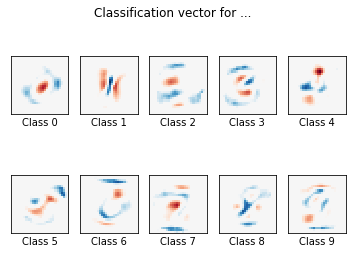

In [68]:
for i in range(10):
    l2_plot = plt.subplot(2, 5, i+1)
    l2_plot.imshow(coef[i].reshape(28,28), interpolation='nearest',
                  cmap = plt.cm.RdBu, vmin = -scale ,vmax = scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel(('Class %i' % i))

#interpolation代表的是插值运算，'nearest'只是选取了其中的一种插值方式。
# cmap表示绘图时的样式，这里选择的是RdBu主题。 
plt.suptitle('Classification vector for ...')

In [69]:
run_time = time.time() - to

In [70]:
print('Example run in %.3f s' % run_time)

Example run in 883.234 s


In [71]:
plt.show()